In [ ]:
import numpy  as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
import seaborn as sns
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [ ]:
#loading data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
#shape of numpy arrays
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [ ]:
print(X_train[10].shape)

(28, 28)


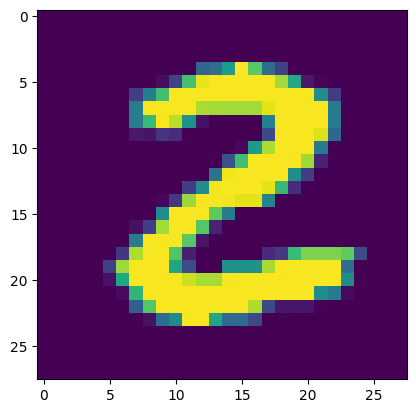

2


In [ ]:
#displaying the image
plt.imshow(X_train[25])
plt.show()

#print the corresponding label
print(y_train[25])


In [ ]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [ ]:
#unique values in y train
print(np.unique(y_train))

#unique values in y train
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [ ]:
#scaling the values  #0/255=0 min value  #255/255=1 max value
X_train = X_train/255
X_test = X_test/255

In [ ]:
#print the 10th element
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

building the neural network

In [ ]:
#setting up the layers of the neural network
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
#compiling the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#training the neural network
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8499 - loss: 0.5189
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9551 - loss: 0.1516
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9668 - loss: 0.1087
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9736 - loss: 0.0853
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9790 - loss: 0.0694
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9829 - loss: 0.0565
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9858 - loss: 0.0473
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9878 - loss: 0.0412
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.9888 - loss: 0.0360
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9898 - loss: 0.0319


training data accuracy=98.96%

In [ ]:
#accuracy on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9673 - loss: 0.1226
0.9703999757766724


test data accuracy=96.71%

In [ ]:
print(X_test.shape)

(10000, 28, 28)


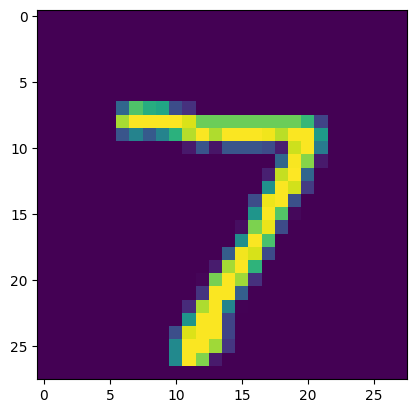

In [ ]:
#first data point in x test
plt.imshow(X_test[0])
plt.show()

In [ ]:
print(y_test[0])

7


In [ ]:
Y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
print(Y_pred.shape)

(10000, 10)


In [ ]:
print(Y_pred[0])

[8.8797569e-05 7.8240270e-03 3.1855726e-01 9.9809039e-01 8.0613856e-05
 4.1579711e-03 1.2221884e-12 1.0000000e+00 1.6244371e-01 9.8648703e-01]


model.predict() gives the prediction probability of each class for that data point

In [ ]:
#converting the predicton probabilities for class label
label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [ ]:
#converting the prediction probabilities to class label for test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 2, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 3, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test--true labels
Y_pred_labels--predicted labels

In [ ]:
conf_mat = confusion_matrix(y_test,Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 961    0    2    3    1    1    3    3    4    2]
 [   0 1119    4    2    0    0    5    0    3    2]
 [   1    2 1003   11    2    0    2    5    6    0]
 [   0    0   10  986    1    2    0    5    1    5]
 [   0    2    4    1  948    1    7    6    2   11]
 [   3    0    0   40    0  835    4    1    5    4]
 [   1    2    1    4    1    6  943    0    0    0]
 [   1    3   13    4    0    0    0  994    5    8]
 [   2    0    7   22    2    2    6    4  925    4]
 [   0    3    2    8    7    3    1    7    3  975]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted Labels')

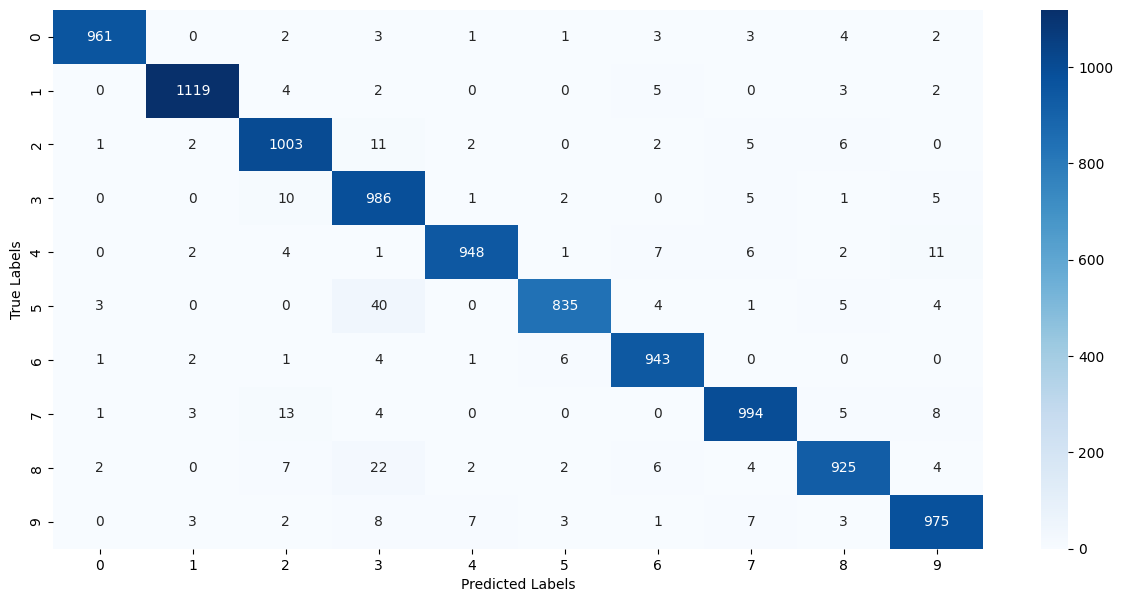

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [ ]:
 input_image_path='/content/329.png'
 input_image=cv2.imread(input_image_path)
 type(input_image)

numpy.ndarray

In [ ]:
cv2_imshow(input_image)

In [ ]:
input_image.shape

(28, 28, 3)

In [ ]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
cv2_imshow(grayscale)

In [ ]:
grayscale.shape

(28, 28)

In [ ]:
cv2_imshow(grayscale)

In [ ]:
input_image = grayscale/255

In [ ]:
type(input_image)

numpy.ndarray

In [ ]:
image_reshaped = np.reshape(input_image, [1,28,28])

In [ ]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[3.9791919e-07 9.9996871e-01 4.8069046e-03 8.3759524e-02 4.0259323e-01
  1.3393536e-06 5.0382152e-02 5.4562533e-01 4.2054195e-02 1.9761501e-03]]


In [ ]:
input_pred_label = np.argmax(input_prediction)

In [ ]:
print(input_pred_label)

1


**predictive system**

In [ ]:
imput_image_path= input('enter the path of the image to be predicted')
imput_image = cv2.imread(imput_image_path)
cv2_imshow(imput_image)
grayscale = cv2.cvtColor(imput_image, cv2.COLOR_BGR2GRAY)
input_image_resize = cv2.resize(grayscale, (28,28))
input_image = grayscale/255
image_reshaped = np.reshape(input_image_resize, [1,28,28])
input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)
print('The Handwritten digit is recognised as ',input_pred_label)

enter the path of the image to be predicted/content/329.png


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
The Handwritten digit is recognised as  1
